21. Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a scatter plot.

Ans:

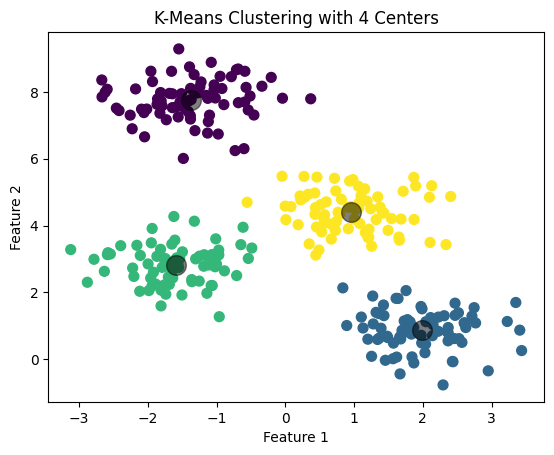

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Step 1: Generate synthetic data with 4 centers
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Step 2: Apply K-Means clustering
kmeans = KMeans(n_clusters=4)
y_kmeans = kmeans.fit_predict(X)

# Step 3: Visualize the results
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Plot the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title('K-Means Clustering with 4 Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

2. Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10 predicted labels.

Ans:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# Step 1: Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

# Step 2: Standardize the data for better clustering performance
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Step 3: Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
predicted_labels = agg_clustering.fit_predict(data_scaled)

# Step 4: Display the first 10 predicted labels
data['Cluster'] = predicted_labels
print("Predicted Cluster Labels (First 10 data points):")
print(data[['Cluster']].head(10))

Predicted Cluster Labels (First 10 data points):
   Cluster
0        1
1        1
2        1
3        1
4        1
5        1
6        1
7        1
8        1
9        1


23. Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot.

Ans:

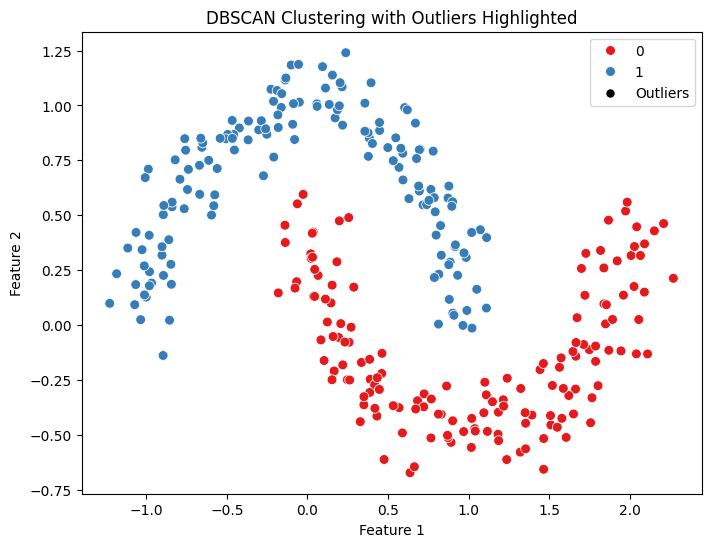

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Step 1: Generate synthetic data
X, y = make_moons(n_samples=300, noise=0.1, random_state=42)

# Step 2: Apply DBSCAN
epsilon = 0.2
min_samples = 5
db = DBSCAN(eps=epsilon, min_samples=min_samples)
clusters = db.fit_predict(X)

# Step 3: Create a DataFrame for visualization
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
df['Cluster'] = clusters

# Step 4: Plotting the clusters and highlighting outliers
plt.figure(figsize=(8, 6))
palette = sns.color_palette("Set1", n_colors=len(set(clusters)) - (1 if -1 in clusters else 0))
sns.scatterplot(x='Feature 1', y='Feature 2', hue='Cluster', palette=palette, data=df, legend='full', s=50)

# Highlighting outliers
outliers = df[df['Cluster'] == -1]
plt.scatter(outliers['Feature 1'], outliers['Feature 2'], color='black', s=50, label='Outliers', edgecolor='w')

plt.title('DBSCAN Clustering with Outliers Highlighted')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

24. Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each
cluster.

Ans:

In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Step 1: Load the Wine dataset
wine_data = load_wine(as_frame=True)
df = wine_data.frame

# Step 2: Standardize the features
scaler = StandardScaler()
features = scaler.fit_transform(df.drop(columns='target'))  # Exclude the target column
scaled_df = pd.DataFrame(features, columns=df.columns[:-1])  # Create a DataFrame with scaled features

# Step 3: Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Assuming 3 clusters based on prior analysis
kmeans.fit(scaled_df)

# Step 4: Count the size of each cluster
cluster_sizes = pd.Series(kmeans.labels_).value_counts()
print("Size of each cluster:")
print(cluster_sizes)

Size of each cluster:
0    65
2    62
1    51
Name: count, dtype: int64


25. Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result.

Ans:

<ipython-input-5-92b39ce93a3e>:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(xy[:, 0], xy[:, 1], c=tuple(col), marker='o', s=10)


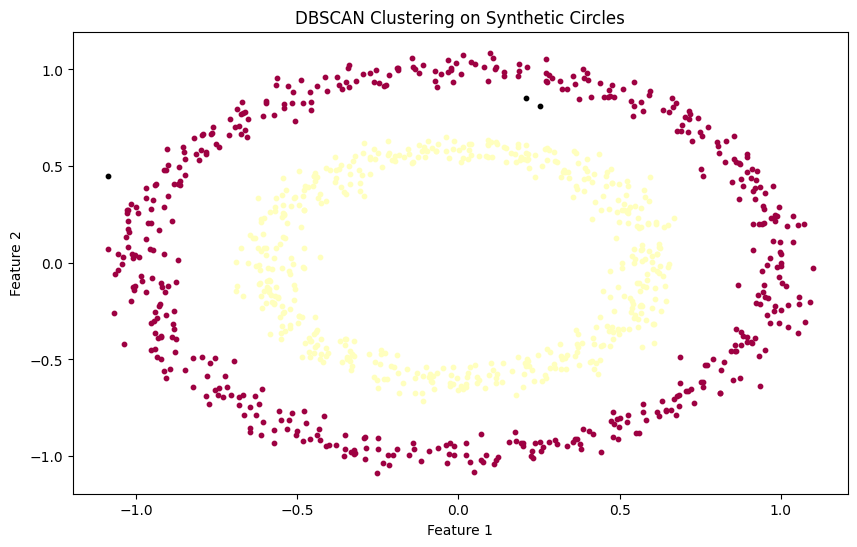

In [5]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN

# Step 1: Generate synthetic data using make_circles
X, _ = make_circles(n_samples=1000, noise=0.05, factor=0.6)

# Step 2: Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.1, min_samples=5)
clusters = dbscan.fit_predict(X)

# Step 3: Plot the results
plt.figure(figsize=(10, 6))
unique_labels = set(clusters)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise
        col = [0, 0, 0, 1]

    class_member_mask = (clusters == k)
    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=tuple(col), marker='o', s=10)

plt.title('DBSCAN Clustering on Synthetic Circles')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

26. Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster centroids.

In [6]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Step 1: Load the Breast Cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)

# Step 2: Apply MinMaxScaler to normalize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Use K-Means with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_scaled)

# Step 4: Output the cluster centroids
centroids = kmeans.cluster_centers_
print("Cluster Centroids:\n", centroids)

Cluster Centroids:
 [[0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]
 [0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]]


27. Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with
DBSCAN.

Ans:

Estimated number of clusters: 2
Estimated number of noise points: 58


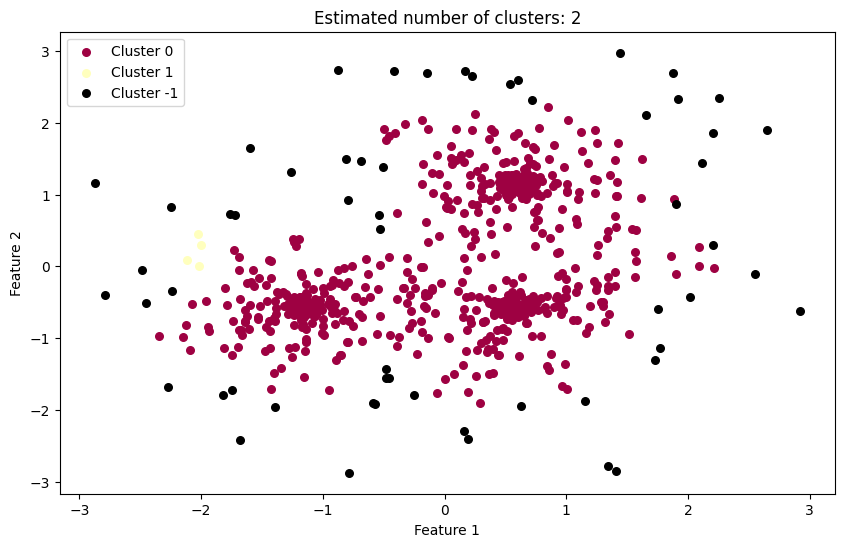

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Step 1: Generate synthetic data with varying cluster standard deviations
centers = [[1, 1], [-1, -1], [1, -1]]
cluster_std = [0.1, 0.5, 1.0]  # Different standard deviations

# Generate data for each standard deviation
X = []
for std in cluster_std:
    X_temp, _ = make_blobs(n_samples=250, centers=centers, cluster_std=std, random_state=0)
    X.append(X_temp)

# Combine the data into a single array
X = np.vstack(X)

# Step 2: Standardize the data
X_scaled = StandardScaler().fit_transform(X)

# Step 3: Apply DBSCAN clustering
db = DBSCAN(eps=0.3, min_samples=5).fit(X_scaled)
labels = db.labels_

# Step 4: Count clusters and noise points
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

# Step 5: Visualize the results
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(10, 6))
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Black for noise
    class_member_mask = (labels == k)
    xy = X_scaled[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], color=col, s=30, label=f'Cluster {k}')

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

28. Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means.

Ans:-

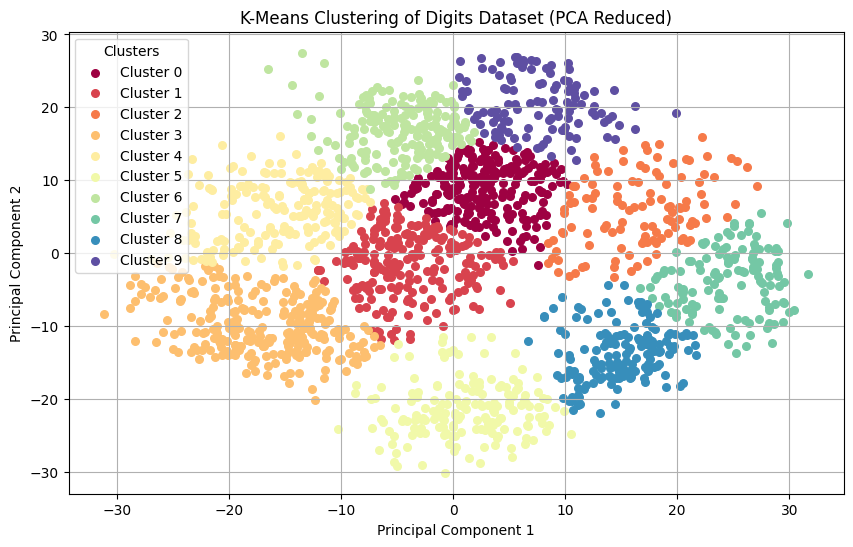

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Step 1: Load the Digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Step 2: Apply PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Step 3: Apply K-Means clustering
n_clusters = 10  # Since there are 10 digits (0-9)
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_pca)
labels = kmeans.labels_

# Step 4: Visualize the clusters
plt.figure(figsize=(10, 6))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    xy = X_pca[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], color=col, s=30, label=f'Cluster {k}')

plt.title('K-Means Clustering of Digits Dataset (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Clusters')
plt.grid(True)  # Optional: Add grid for better readability
plt.show()

29. Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart.

Ans:-

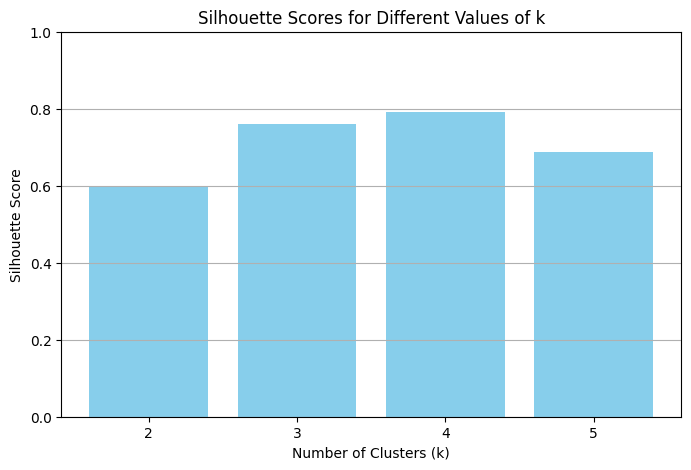

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 1: Generate synthetic data
X, _ = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)

# Step 2: Evaluate silhouette scores for k = 2 to 5
k_values = range(2, 6)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Step 3: Visualize silhouette scores as a bar chart
plt.figure(figsize=(8, 5))
plt.bar(k_values, silhouette_scores, color='skyblue')
plt.xticks(k_values)
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

30.  Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage.

Ans:-

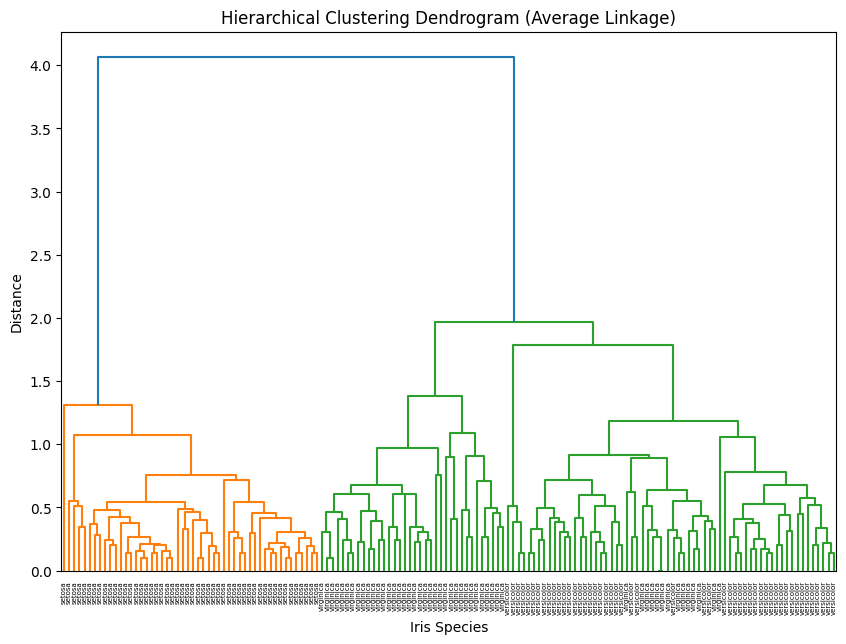

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data

# Step 2: Compute the linkage matrix using average linkage
linkage_matrix = linkage(X, method='average')

# Step 3: Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, labels=iris.target_names[iris.target], leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram (Average Linkage)')
plt.xlabel('Iris Species')
plt.ylabel('Distance')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

31. Generate synthetic data with overlapping clusters using make_blobs, then apply K-Means and visualize with
decision boundaries.

Ans:

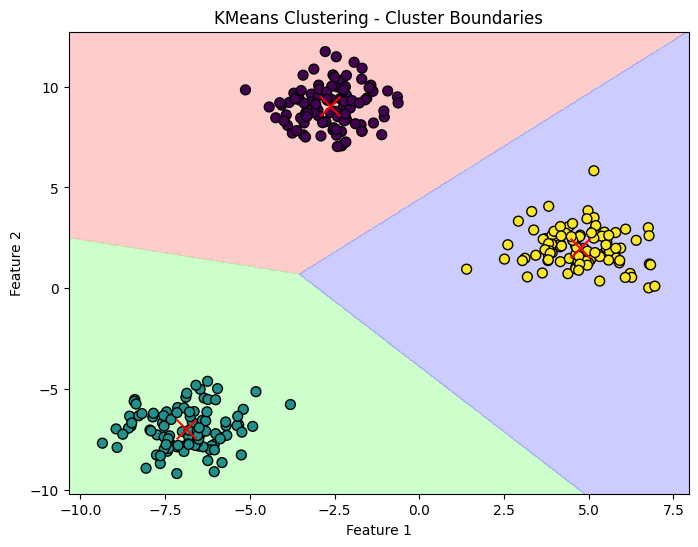

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap

# Step 1: Generate synthetic data with overlapping clusters
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

# Step 2: Create a meshgrid for plotting decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Step 3: Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
Z_kmeans = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z_kmeans = Z_kmeans.reshape(xx.shape)

# Step 4: Define color map for cluster zones
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

# Step 5: Plot decision boundaries for K-Means
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z_kmeans, cmap=cmap_light, alpha=0.6)

# Step 6: Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, s=50, edgecolor='k', cmap='viridis')

# Step 7: Plot the cluster centers
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='x')

plt.title('KMeans Clustering - Cluster Boundaries')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

32.  Load the Digits dataset and apply DBSCAN after reducing dimensions with t-SNE. Visualize the results.

Ans:-

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


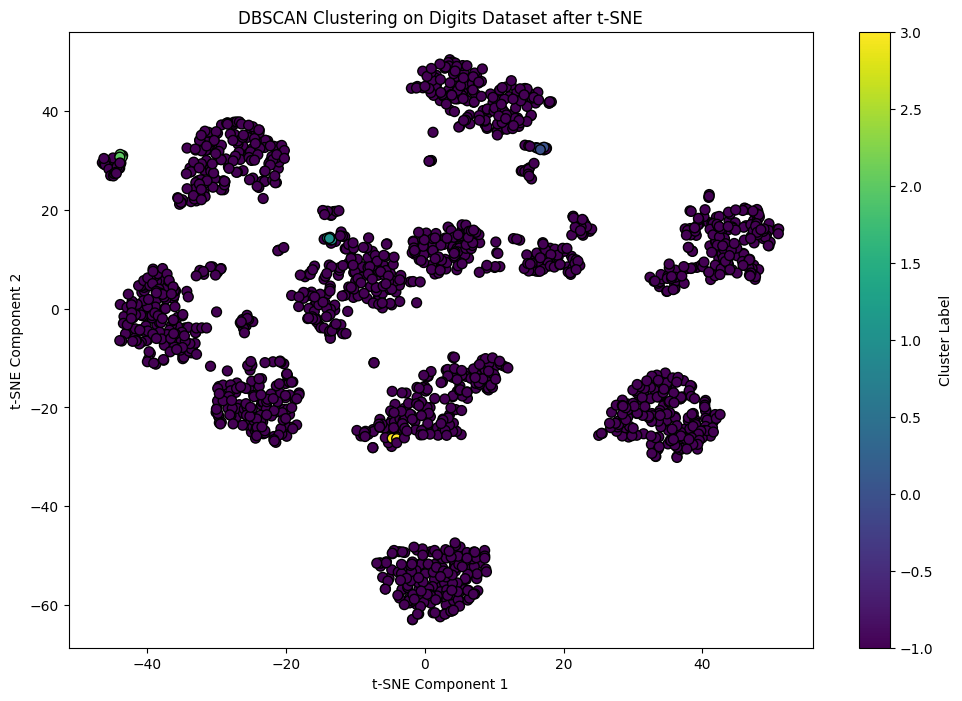

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import pandas as pd

# Step 1: Load the Digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Step 2: Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X)

# Step 3: Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_tsne)

# Step 4: Create a DataFrame for visualization
df = pd.DataFrame(X_tsne, columns=['x_component', 'y_component'])
df['labels'] = labels

# Step 5: Plot the results
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['x_component'], df['y_component'], c=df['labels'], cmap='viridis', s=50, edgecolor='k')
plt.title('DBSCAN Clustering on Digits Dataset after t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(scatter, label='Cluster Label')
plt.show()

33. Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot
the result.

Ans:

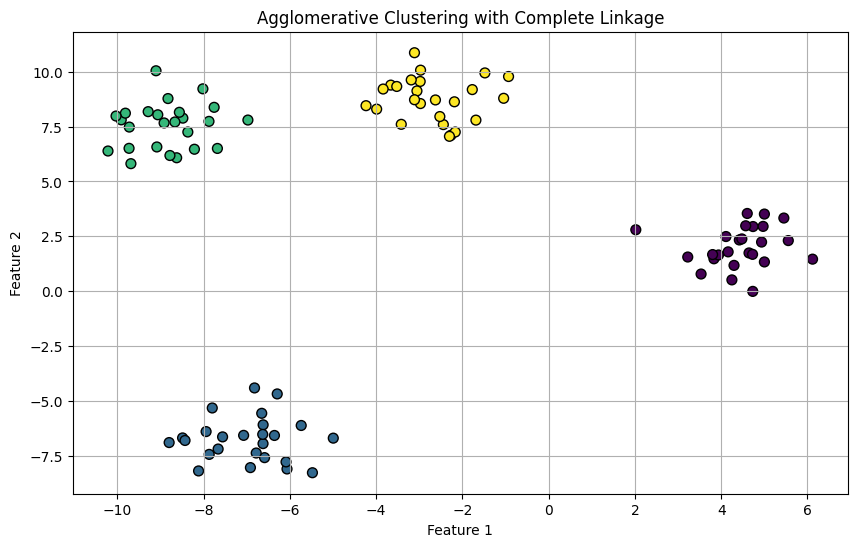

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Step 1: Generate synthetic data
X, y = make_blobs(n_samples=100, centers=4, n_features=2, random_state=42)

# Step 2: Apply Agglomerative Clustering with complete linkage
n_clusters = 4
clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete')
cluster_labels = clusterer.fit_predict(X)

# Step 3: Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('Agglomerative Clustering with Complete Linkage')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

34. Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using K-Means. Show results in a
line plot.

Ans:

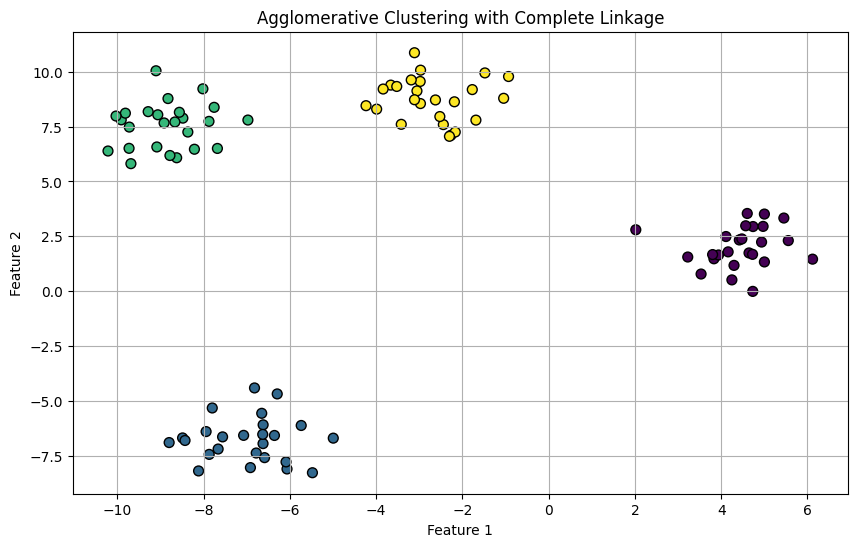

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Step 1: Generate synthetic data
X, y = make_blobs(n_samples=100, centers=4, n_features=2, random_state=42)

# Step 2: Apply Agglomerative Clustering with complete linkage
n_clusters = 4
clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete')
cluster_labels = clusterer.fit_predict(X)

# Step 3: Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('Agglomerative Clustering with Complete Linkage')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

35. Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with single linkage.

Ans:

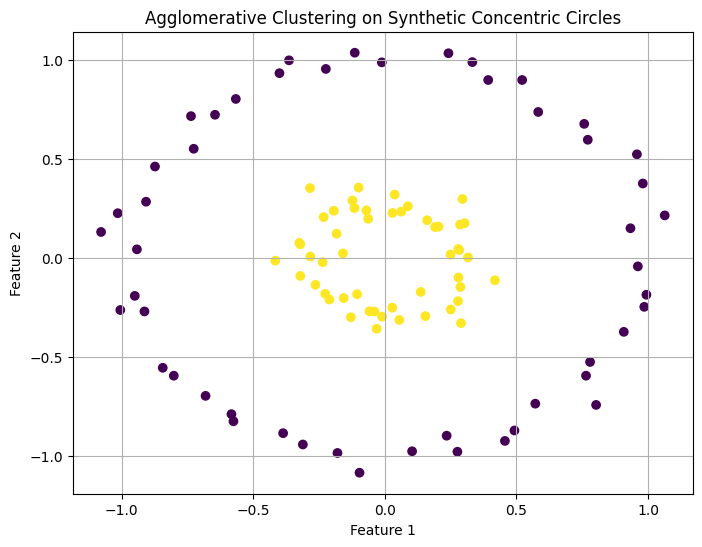

In [18]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# Generate synthetic concentric circles
X, _ = make_circles(n_samples=100, noise=0.05, random_state=42, factor=0.3)

# Apply Agglomerative Clustering with single linkage
clustering = AgglomerativeClustering(linkage='single', n_clusters=2)
labels = clustering.fit_predict(X)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')
plt.title('Agglomerative Clustering on Synthetic Concentric Circles')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()
plt.show()

36. Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding
noise).

Ans:

In [19]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Load the Wine dataset
wine_data = load_wine(as_frame=True)
df = wine_data.frame

# Drop the target column for clustering
df.drop('target', axis=1, inplace=True)

# Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_features, columns=df.columns)

# Apply DBSCAN
db = DBSCAN(eps=0.5, min_samples=5).fit(scaled_df)
labels = db.labels_

# Count the number of clusters (excluding noise)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print(f'Number of clusters (excluding noise): {n_clusters}')

Number of clusters (excluding noise): 0


37. Generate synthetic data with make_blobs and apply KMeans. Then plot the cluster centers on top of the
data points.

Ans:

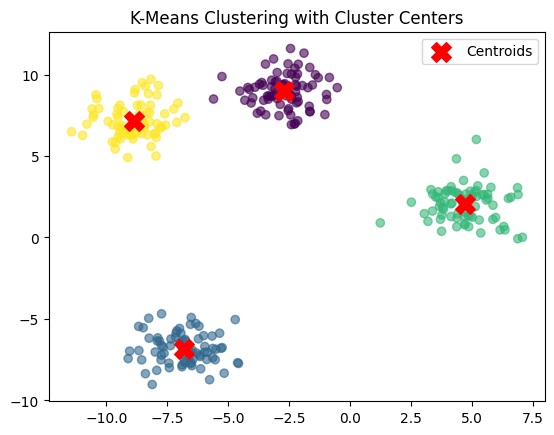

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.05, random_state=42)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# Get cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot clustered data
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title("K-Means Clustering with Cluster Centers")
plt.legend()
plt.show()

38. Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise.

Ans:

Number of samples identified as noise: 120


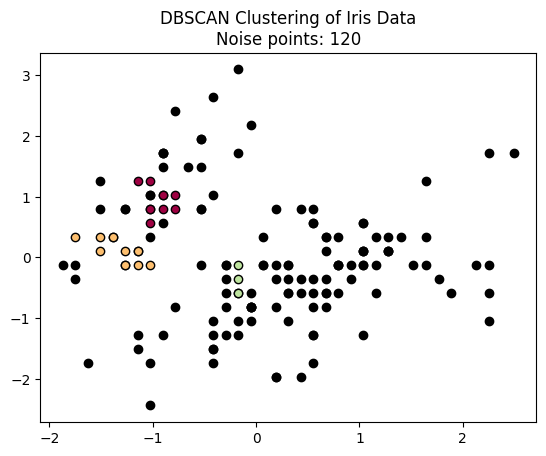

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data

# Scale the features
X = StandardScaler().fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(X)

# Get the predicted labels
labels = dbscan.labels_

# Count the number of noise samples
n_noise = list(labels).count(-1)

# Print the number of noise samples
print(f"Number of samples identified as noise: {n_noise}")

# Optional: Plot the results
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    xy = X[class_member_mask]

    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title(f"DBSCAN Clustering of Iris Data\nNoise points: {n_noise}")
plt.show()

39. Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the
clustering result.

Ans:-

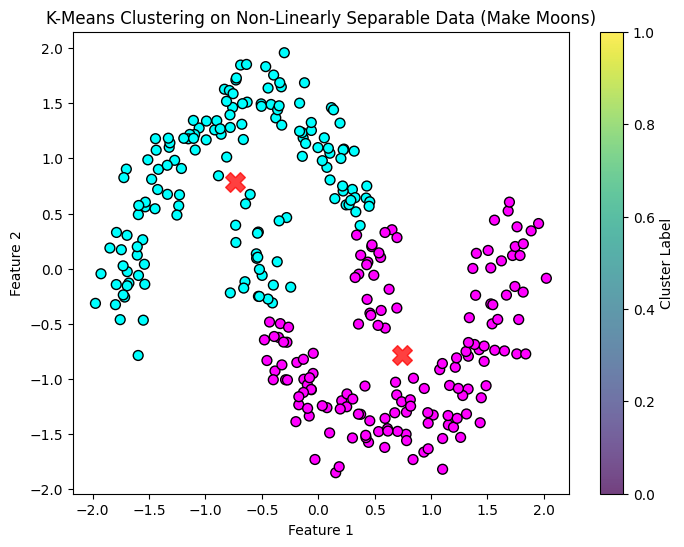

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Generate synthetic non-linearly separable data
X, y = make_moons(n_samples=300, noise=0.1, random_state=42)

# Step 2: Standardize the dataset
X_scaled = StandardScaler().fit_transform(X)

# Step 3: Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Step 4: Visualize the clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, s=50, cmap='cool', edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("K-Means Clustering on Non-Linearly Separable Data (Make Moons)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label='Cluster Label')
plt.show()

40. Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D
scatter plot.

Ans:

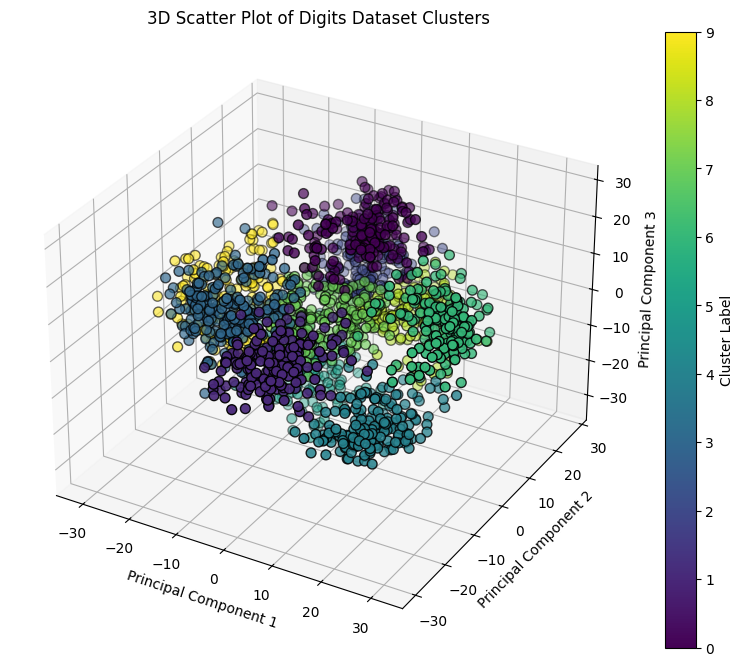

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Step 1: Load the Digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Step 2: Apply PCA to reduce to 3 components
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X)

# Step 3: Use KMeans to cluster the data
kmeans = KMeans(n_clusters=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_reduced)

# Step 4: Visualize the clustering result with a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y_kmeans, s=50, cmap='viridis', edgecolors='k')

# Adding labels and title
ax.set_title("3D Scatter Plot of Digits Dataset Clusters")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
plt.colorbar(scatter, label='Cluster Label')
plt.show()

41. Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score to evaluate the
clustering.

Ans:

Average silhouette score for 5 clusters: 0.83


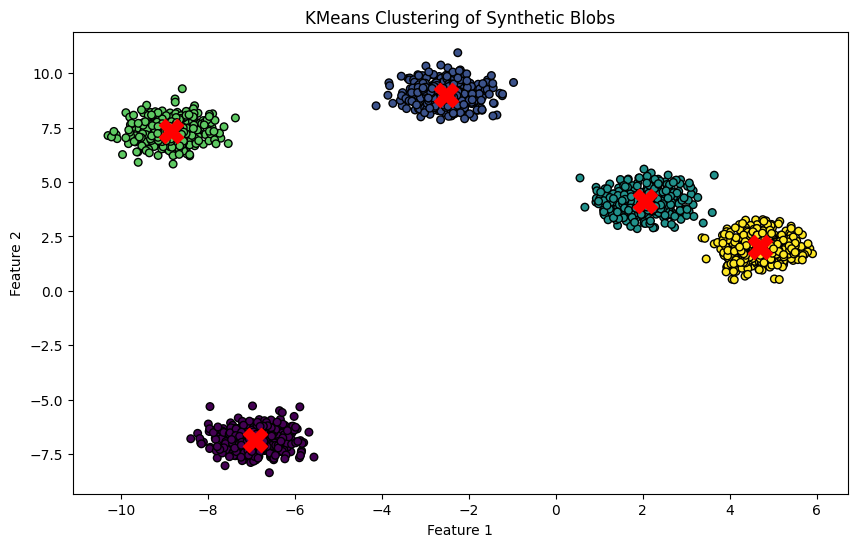

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 1: Generate synthetic blobs with 5 centers
n_samples = 2000
n_centers = 5
X, y = make_blobs(n_samples=n_samples, centers=n_centers, cluster_std=0.5, random_state=42)

# Step 2: Apply KMeans clustering
kmeans = KMeans(n_clusters=n_centers, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Step 3: Evaluate clustering using silhouette_score
silhouette_avg = silhouette_score(X, y_kmeans)
print(f"Average silhouette score for {n_centers} clusters: {silhouette_avg:.2f}")

# Step 4: Visualize the clustering result
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=30, cmap='viridis', edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.title("KMeans Clustering of Synthetic Blobs")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

42. Load the Breast Cancer dataset, reduce dimensionality using PCA, and apply Agglomerative Clustering.Visualize in 2D.

Ans:

Average silhouette score for 5 clusters: 0.83


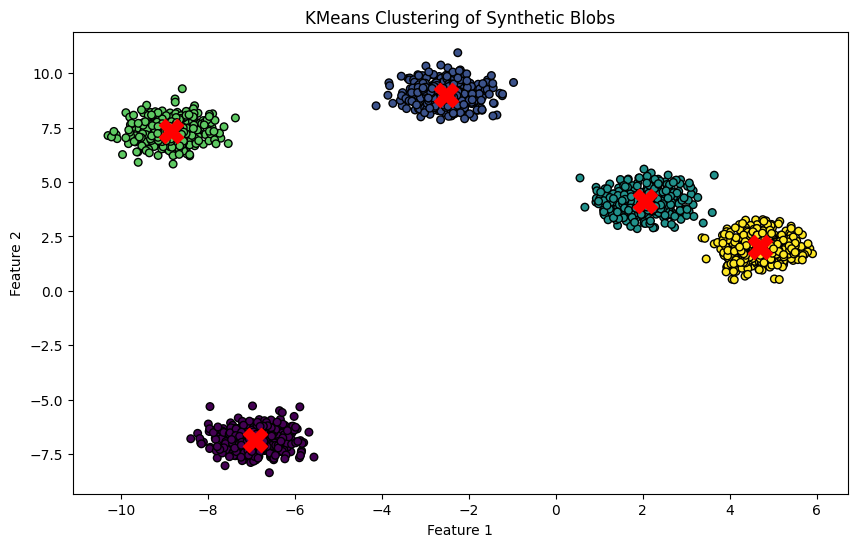

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 1: Generate synthetic blobs with 5 centers
n_samples = 2000
n_centers = 5
X, y = make_blobs(n_samples=n_samples, centers=n_centers, cluster_std=0.5, random_state=42)

# Step 2: Apply KMeans clustering
kmeans = KMeans(n_clusters=n_centers, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Step 3: Evaluate clustering using silhouette_score
silhouette_avg = silhouette_score(X, y_kmeans)
print(f"Average silhouette score for {n_centers} clusters: {silhouette_avg:.2f}")

# Step 4: Visualize the clustering result
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=30, cmap='viridis', edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.title("KMeans Clustering of Synthetic Blobs")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

43. Generate noisy circular data using make_circles and visualize clustering results from KMeans and DBSCAN
side-by-side.

Ans:-

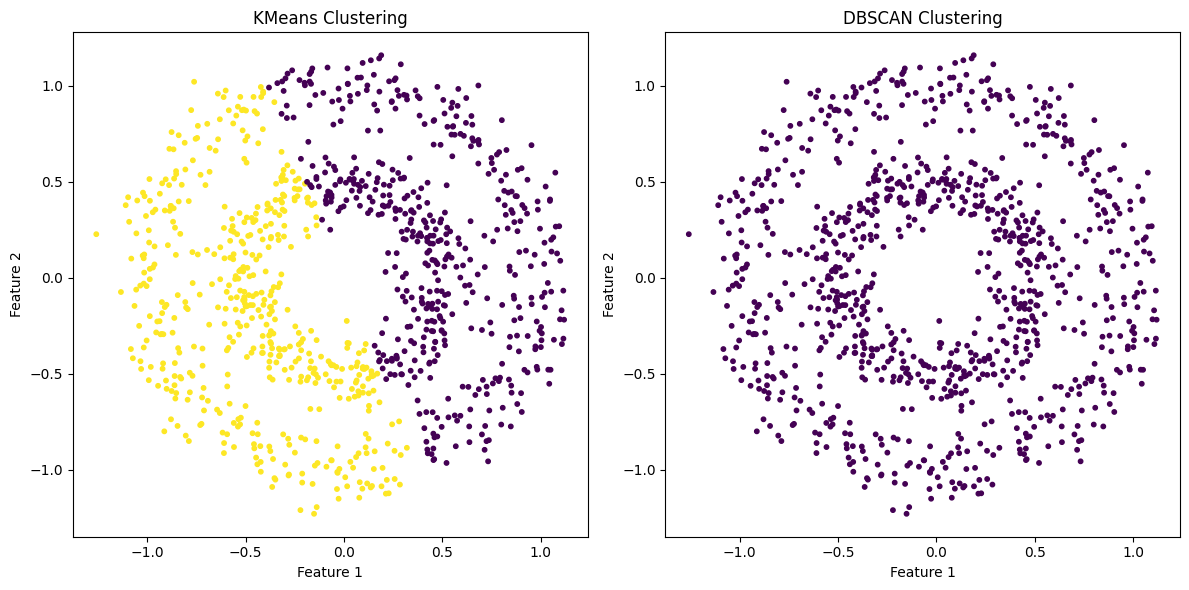

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans, DBSCAN

# Step 2: Generate noisy circular data
X, _ = make_circles(n_samples=1000, noise=0.1, factor=0.5, random_state=42)

# Step 3: Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Step 4: Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Step 5: Visualize the results side-by-side
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# KMeans visualization
axs[0].scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', s=10)
axs[0].set_title('KMeans Clustering')
axs[0].set_xlabel('Feature 1')
axs[0].set_ylabel('Feature 2')

# DBSCAN visualization
axs[1].scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', s=10)
axs[1].set_title('DBSCAN Clustering')
axs[1].set_xlabel('Feature 1')
axs[1].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

44. Load the Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering.

Ans:-

The average silhouette_score is: 0.551191604619592


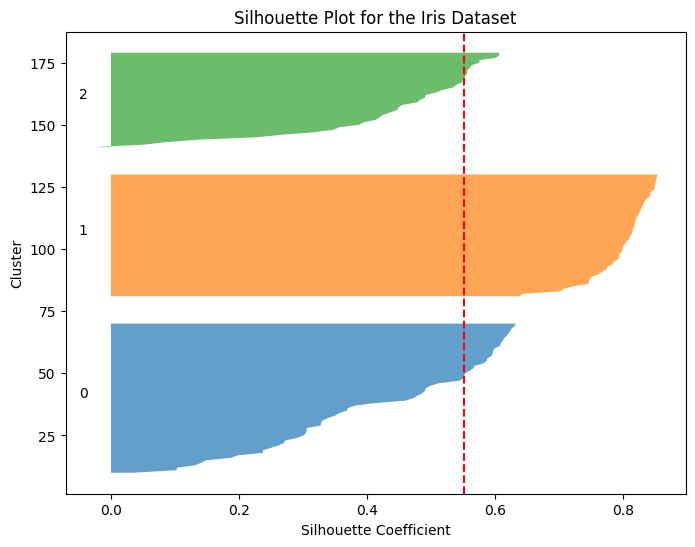

In [27]:
# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Step 2: Load the Iris dataset
X, y = datasets.load_iris(return_X_y=True)

# Step 3: Apply KMeans clustering
n_clusters = 3  # There are three species in the Iris dataset
kmeans = KMeans(n_clusters=n_clusters, random_state=1)
cluster_labels = kmeans.fit_predict(X)

# Step 4: Calculate the Silhouette Coefficient
silhouette_avg = silhouette_score(X, cluster_labels)
print("The average silhouette_score is:", silhouette_avg)

# Step 5: Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X, cluster_labels)

# Step 6: Visualize the Silhouette Coefficient for each sample
fig, ax = plt.subplots(figsize=(8, 6))
y_lower = 10

for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to cluster i
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    # Fill the silhouette plot for the cluster
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, alpha=0.7)

    # Label the silhouette plots with their cluster numbers
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Update the next y_lower for the next cluster
    y_lower = y_upper + 10  # 10 for the space between clusters

# Finalize the plot
ax.set_title("Silhouette Plot for the Iris Dataset")
ax.set_xlabel("Silhouette Coefficient")
ax.set_ylabel("Cluster")
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.show()

45. Generate synthetic data using make_blobs and apply Agglomerative Clustering with 'average' linkage.
Visualize clusters.

Ans:

In [ ]:
# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

# Step 2: Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Step 3: Apply Agglomerative Clustering with 'average' linkage
agg_clustering = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average')
cluster_labels = agg_clustering.fit_predict(X)

# Step 4: Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.title("Agglomerative Clustering with 'Average' Linkage")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)  # Optional: Add grid for better visualization
plt.show()

46. Load the Wine dataset, apply KMeans, and visualize the cluster assignments in a seaborn pairplot (first 4
features).

Ans:-

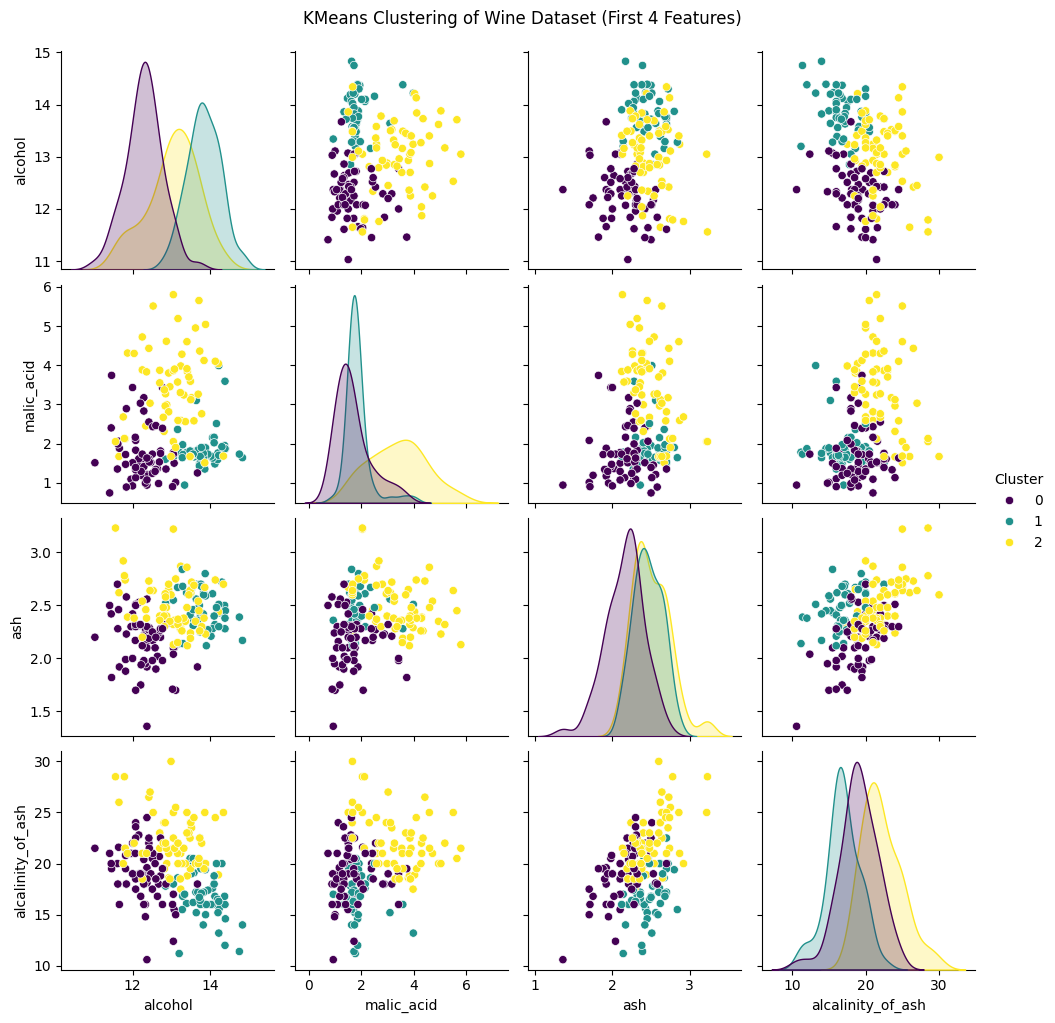

In [30]:
# Step 1: Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 2: Load the Wine dataset
wine_data = load_wine(as_frame=True)
df = wine_data.frame

# Step 3: Select the first four features
X = df.iloc[:, :4]  # First four features

# Step 4: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust n_clusters as needed
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 6: Visualize the cluster assignments using seaborn pairplot
sns.pairplot(df, hue='Cluster', vars=df.columns[:4], palette='viridis')
plt.suptitle("KMeans Clustering of Wine Dataset (First 4 Features)", y=1.02)
plt.show()

47. Generate noisy blobs using make_blobs and use DBSCAN to identify both clusters and noise points. Print the count.

Ans:

Estimated number of clusters: 4
Estimated number of noise points: 18


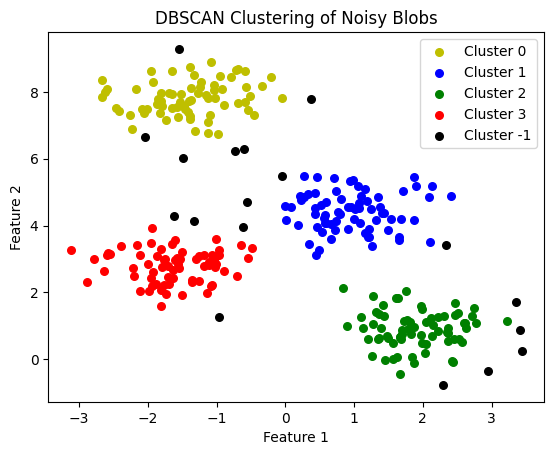

In [31]:
 #Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

# Step 2: Generate synthetic dataset with noise
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Step 3: Apply DBSCAN to identify clusters and noise points
db = DBSCAN(eps=0.5, min_samples=5).fit(X)
labels = db.labels_

# Step 4: Count the number of clusters and noise points
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Exclude noise label
n_noise = list(labels).count(-1)

# Step 5: Print the counts
print(f'Estimated number of clusters: {n_clusters}')
print(f'Estimated number of noise points: {n_noise}')

# Optional: Visualize the results
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r', 'k']  # Color for noise is black
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = 'k'  # Black for noise
    class_member_mask = (labels == k)
    plt.scatter(X[class_member_mask, 0], X[class_member_mask, 1], c=col, s=30, label=f'Cluster {k}')

plt.title('DBSCAN Clustering of Noisy Blobs')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()